# Author : Thejaswini Y R


## Prediction using unsupervised ML

### From the given 'Iris' dataset , predict the optimum number of clusters and represent it visually.


# Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans


# loading the dataset

In [2]:
iris=datasets.load_iris()


# Exploratory data analysis

In [3]:
# Reading the dataset
data_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# First 5 rows
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
data_df.shape

(150, 4)

In [6]:
# Statistical properties of dataset
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Data information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Hence from above we can clearly seen that there is no null value

# Data visualization

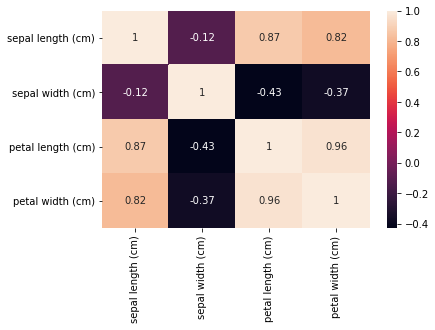

In [8]:
sns.heatmap(data_df.corr(), annot=True, linecolor='black')

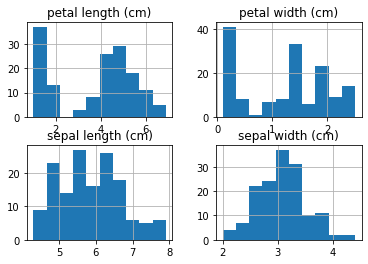

In [9]:
data_df.hist()
plt.show()

# Finding the numbers of clusters for Kmeans
Finding the kmeans clusters using elbow method

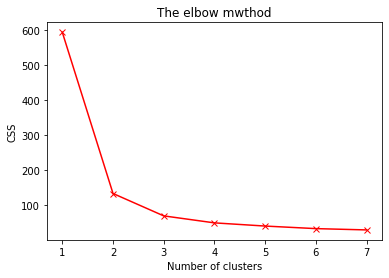

In [10]:
# setin the value
x=data_df.iloc[:,0:3].values

css=[]

# Finding inertia on various K values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i,init = 'k-means++',
                   max_iter =100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1,8),css,'bx-',color='red')
plt.title('The elbow mwthod')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()

Hence from above most accurate value for number of clusters is 3.

# Applying K-Means classifier

In [11]:
kmeans= KMeans(n_clusters=3, init= 'k-means++', max_iter=100, n_init = 10, random_state=0)

y_kmeans = kmeans.fit_predict(x)

# Visualizing the clusters

In [12]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     ],
       [5.84655172, 2.73275862, 4.3637931 ],
       [6.83571429, 3.06428571, 5.6547619 ]])

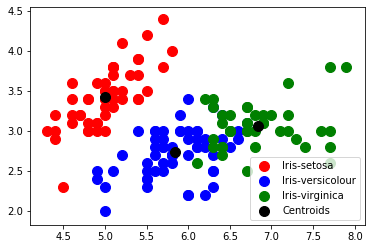

In [13]:
# Visualizing the clusters - on the first two columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100 ,c='black', label='Centroids')
plt.legend()